# РК №2

### Рыжкова Юлия Николаевна ИУ5-61Б
### Вариант 14

Задание. Для заданного набора данных (вариант 14) постройте модели регрессии. Для построения моделей используйте методы Линейная регрессия и Случайный лес. Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

Данные: https://www.kaggle.com/noriuk/us-education-datasets-unification-project (файл states_all.csv)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import scipy
import plotly
import missingno as msno
from numpy import nan
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

### Загрузим датасет и выведем информацию о нем.

In [2]:
dataset = pd.read_csv('./Datasets/states_all.csv')

In [3]:
dataset.head(5)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

### Подсчитаем количество и процент пропусков по столбцам.

In [5]:
for col in dataset.columns:
    pct_missing = np.mean(dataset[col].isnull())
    print('{}: {} - {}%'.format(col, dataset[col].isna().sum(), round(pct_missing*100, 2)))

PRIMARY_KEY: 0 - 0.0%
STATE: 0 - 0.0%
YEAR: 0 - 0.0%
ENROLL: 491 - 28.63%
TOTAL_REVENUE: 440 - 25.66%
FEDERAL_REVENUE: 440 - 25.66%
STATE_REVENUE: 440 - 25.66%
LOCAL_REVENUE: 440 - 25.66%
TOTAL_EXPENDITURE: 440 - 25.66%
INSTRUCTION_EXPENDITURE: 440 - 25.66%
SUPPORT_SERVICES_EXPENDITURE: 440 - 25.66%
OTHER_EXPENDITURE: 491 - 28.63%
CAPITAL_OUTLAY_EXPENDITURE: 440 - 25.66%
GRADES_PK_G: 173 - 10.09%
GRADES_KG_G: 83 - 4.84%
GRADES_4_G: 83 - 4.84%
GRADES_8_G: 83 - 4.84%
GRADES_12_G: 83 - 4.84%
GRADES_1_8_G: 695 - 40.52%
GRADES_9_12_G: 644 - 37.55%
GRADES_ALL_G: 83 - 4.84%
AVG_MATH_4_SCORE: 1150 - 67.06%
AVG_MATH_8_SCORE: 1113 - 64.9%
AVG_READING_4_SCORE: 1065 - 62.1%
AVG_READING_8_SCORE: 1153 - 67.23%


### Обработка пропусков.
Последние 4 столбца невозможно восстановить из-за слишком большого процента пропусков. Посмотрим на корреляционную матрицу признаков.

<AxesSubplot: >

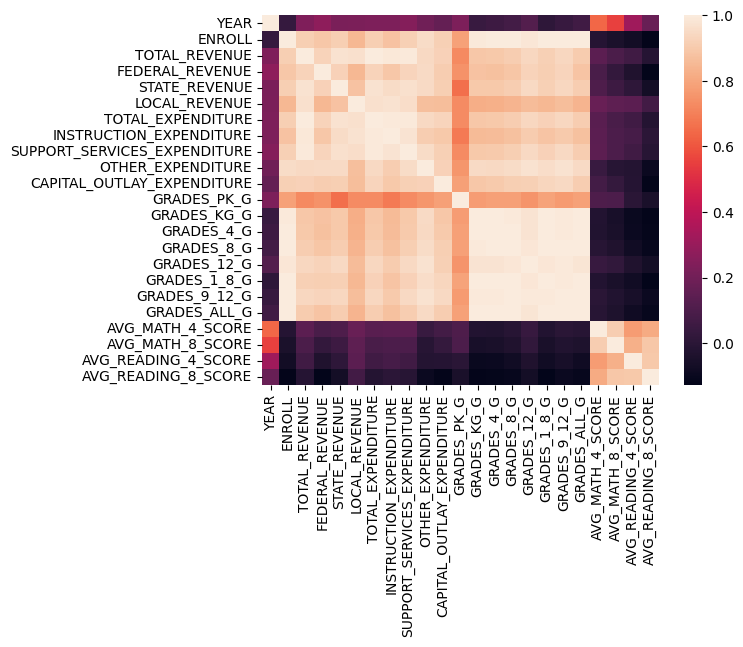

In [6]:
corr = dataset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Видно, что последние 4 признака не коррелируют с остальными. Так как мы не будем выбирать эти признаки а качестве целевых, их можно вырезать из датасета и не использовать для построения модели. Также удалим столбец PRIMARY_KEY, так как он является первичным ключом и не нужен для построения модели.

In [7]:
dataset.drop(['PRIMARY_KEY'], axis=1, inplace=True)
dataset.drop(['AVG_MATH_4_SCORE', 
              'AVG_MATH_8_SCORE', 
              'AVG_READING_4_SCORE', 
              'AVG_READING_8_SCORE'], axis=1, inplace=True)

В строках с процентом пропусков >20 заполнение приведет к резкому снижению достоверности. Условия задачи позволяют сократить набор данных, поэтому лучшим решением будет удалить строки с пропусками.

По количеству пропусков очевидно, что в столбцах ENROLL, TOTAL_REVENUE, ... CAPITAL_OUTLAY_EXPENDITURE отсутствующие значения находятся на одних и тех же строчках, поэтому достаточно очистить один из этих столбцов.

Также почистим пропуски в паре столбцов GRADES_1_8_G и GRADES_9_12_G

In [8]:
dataset.dropna(subset=['ENROLL'], axis=0, inplace=True)
dataset.dropna(subset=['GRADES_1_8_G', 'GRADES_9_12_G'], axis=0, inplace=True)

In [9]:
for col in dataset.columns:
    pct_missing = np.mean(dataset[col].isnull())
    if pct_missing > 0:
        print('{}: {} - {}%'.format(col, dataset[col].isna().sum(), round(pct_missing*100, 2)))

GRADES_PK_G: 8 - 0.78%


Осталось лишь заполнить пропуски в столбце GRADES_PK_G. Посмотрим гистограмму распределения его значений.

<AxesSubplot: ylabel='Frequency'>

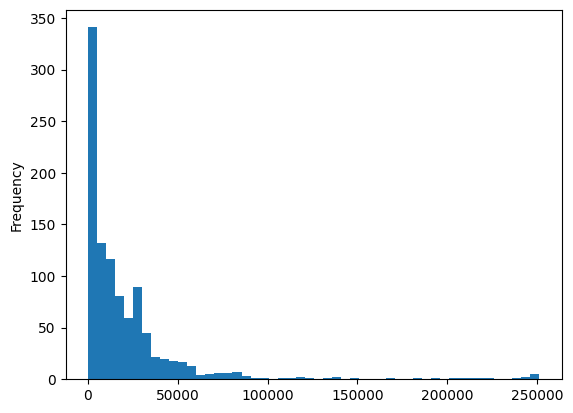

In [10]:
dataset['GRADES_PK_G'].plot.hist(bins=50)

Наиболее оптимальной стратегией в данном случае является заполнение наиболее часто встречающимся значением.

In [11]:
imputer = SimpleImputer(strategy='most_frequent', missing_values=nan)
imputer = imputer.fit(dataset[['GRADES_PK_G']])
dataset['GRADES_PK_G'] = imputer.transform(dataset[['GRADES_PK_G']])

In [12]:
dataset.shape

(1020, 20)

### Кодирование признаков и разделение выборки.
В качестве целевого признака возьмем ENROLL. Закодируем столбец STATE с названиями штатов при помощи LabelEncoder.

In [13]:
le = LabelEncoder()
dataset['STATE']= le.fit_transform(dataset['STATE'])

In [14]:
X = dataset.drop(columns="ENROLL")
y = dataset["ENROLL"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

### Обучение модели линейной регрессии и оценка её качетва.
В качестве метрик возьмём:
1) MSE - чтобы подчеркнуть большие ошибки
2) Median Absolute Error - чтобы оценить качество модели с устойчивостью к выбросам
3) R2 - чтобы точно и наглядно интерпретировать качество модели

In [16]:
reg = LinearRegression().fit(X_train, y_train)

In [17]:
y_pred_test_reg = reg.predict(X_test)
y_pred_train_reg = reg.predict(X_train)
mse_reg = mean_squared_error(y_train, y_pred_train_reg), mean_squared_error(y_test, y_pred_test_reg)
mse_reg

(617608112.5351241, 706205103.8209462)

In [18]:
med_reg = median_absolute_error(y_train, y_pred_train_reg), median_absolute_error(y_test, y_pred_test_reg)
med_reg

(9091.4630940489, 10168.79657311365)

In [19]:
r2_reg = r2_score(y_train, y_pred_train_reg), r2_score(y_test, y_pred_test_reg)
r2_reg

(0.9995102798427169, 0.9992288185054551)

### Обучение модели случайного леса и оценка её качетва.
Метрики аналогичные.

In [20]:
rf = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=1).fit(X_train, y_train)

In [22]:
# Out-of-bag error
rf.oob_score_, 1-rf.oob_score_

(0.8872613654792976, 0.11273863452070243)

In [23]:
y_pred_test_rf = rf.predict(X_test)
y_pred_train_rf = rf.predict(X_train)
mse_rf = mean_squared_error(y_train, y_pred_train_rf), mean_squared_error(y_test, y_pred_test_rf)
mse_rf

(134284743.18044087, 551655859.0731376)

In [24]:
med_rf = median_absolute_error(y_train, y_pred_train_rf), median_absolute_error(y_test, y_pred_test_rf)
med_rf

(1730.2000000000116, 4664.800000000003)

In [25]:
r2_rf = r2_score(y_train, y_pred_train_rf), r2_score(y_test, y_pred_test_rf)
r2_rf

(0.9998935215645386, 0.999397587488999)

### Сравним качество 2-ух моделей.

In [31]:
print('--------------------------- MSE ---------------------------')
print('LinearRegression: ', mse_reg)
print('RandomForest:     ', mse_rf)
print('--------------------------- MedAE -------------------------')
print('LinearRegression: ', med_reg)
print('RandomForest:     ', med_rf)
print('--------------------------- R2 ----------------------------')
print('LinearRegression: ', r2_reg)
print('RandomForest:     ', r2_rf)

--------------------------- MSE ---------------------------
LinearRegression:  (617608112.5351241, 706205103.8209462)
RandomForest:      (134284743.18044087, 551655859.0731376)
--------------------------- MedAE -------------------------
LinearRegression:  (9091.4630940489, 10168.79657311365)
RandomForest:      (1730.2000000000116, 4664.800000000003)
--------------------------- R2 ----------------------------
LinearRegression:  (0.9995102798427169, 0.9992288185054551)
RandomForest:      (0.9998935215645386, 0.999397587488999)


### Вывод.
Обе модели получились очень точными, что показывает практически единичный коэффициент детерминации.

Модель Случайного леса оказалась немного более устойчивой к выбросам в данных, что показывает разница на порядок в метрике MSE, а также в целом немного точнее модели Линейной регрессии, что также показывает метрика MedAE.

Такой высокой точности удалось добиться из-за сильной корреляции в признаках выборки, а также из-за малого объёма выборки.